# The relationship between Money Supply & Stock Market Performance
# Vector AutoRegression Approach

**Import most Libs**

In [136]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests # This module could help to develop 4 tests that should give similar resultx
from statsmodels.tsa.vector_ar.vecm import coint_johansen # the Johanson's Cointegration Test
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

**create data set and select variables**

(13061, 4)
             DJIA  SP500    M2  NASDAQCOM
DATE                                     
1971-02-05   True   True  True      False
1971-02-08   True   True  True      False
1971-02-09   True   True  True      False
1971-02-10   True   True  True      False
1971-02-11   True   True  True      False
...           ...    ...   ...        ...
2021-02-22  False  False  True      False
2021-02-23  False  False  True      False
2021-02-24  False  False  True      False
2021-02-25  False  False  True      False
2021-02-26  False  False  True      False

[13061 rows x 4 columns]


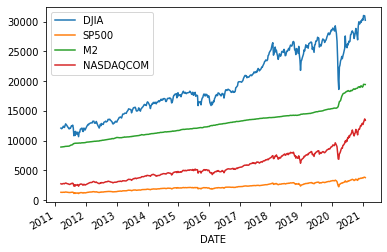

In [137]:
# The data set
start_date = dt.datetime(1900,1,1)
end_date = dt.datetime(2021,2,28)
fred_data = web.DataReader(["DJIA","SP500","M2","NASDAQCOM"], "fred",start=start_date, end=end_date)
print(fred_data.shape)
print(fred_data.isnull())
fred_data.dropna().plot(legend="best")
#fred_data2 = fred_data[["DJIA","SP500","M2","NASDAQCOM"]].pct_change().dropna()
#fred_data2.plot(legend="best")


                DJIA     SP500
DATE                          
2011-03-08  0.010285  0.008923
2011-03-09 -0.000106 -0.001362
2011-03-10 -0.018708 -0.018871
2011-03-11  0.004989  0.007080
2011-03-14 -0.004254 -0.006049
The correlation between pct_change in the DJIA 
 and SP500 is:  0.9734707109657427


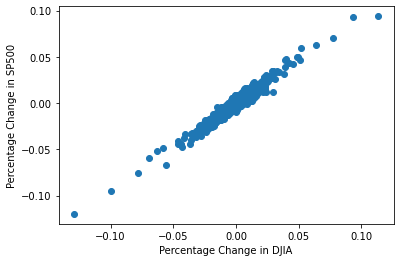

            NASDAQCOM     SP500
DATE                           
2011-03-08   0.007335  0.008923
2011-03-09  -0.005080 -0.001362
2011-03-10  -0.018425 -0.018871
2011-03-11   0.005402  0.007080
2011-03-14  -0.005391 -0.006049
The correlation between the pct_change in NASDAQCOM 
 and SP500 is:  0.9521974434207157


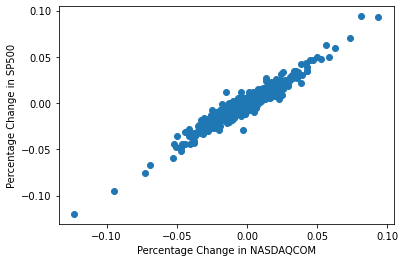

In [138]:
fred_data_pct = fred_data[["DJIA","SP500"]].pct_change().dropna()
print(fred_data_pct.head())

plt.scatter(fred_data_pct["DJIA"],fred_data_pct["SP500"])
print("The correlation between pct_change in the DJIA \n and SP500 is: ",fred_data_pct["DJIA"].corr(fred_data_pct["SP500"]))
plt.xlabel("Percentage Change in DJIA")
plt.ylabel("Percentage Change in SP500")
plt.show()

fred_data_pct = fred_data[["NASDAQCOM","SP500"]].pct_change().dropna()
print(fred_data_pct.head())

plt.scatter(fred_data_pct["NASDAQCOM"],fred_data_pct["SP500"])
print("The correlation between the pct_change in NASDAQCOM \n and SP500 is: ",fred_data_pct["NASDAQCOM"].corr(fred_data_pct["SP500"]))
plt.xlabel("Percentage Change in NASDAQCOM")
plt.ylabel("Percentage Change in SP500")
plt.show()

# As we can see DJIA and SP500 are very highly correlated and this means 
# the two variable basicly have the same information and one should be dropped
# I choose to drop DJIA and use SP500

**Ganger Causality test**

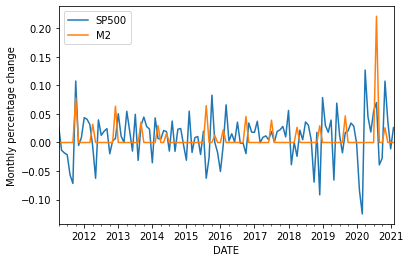

In [139]:
# Before developping models and make forcast, we need to make sure that the two time series variable are related
# Granger Causality between the two variable
mini_fred_data = fred_data[["SP500","M2"]].groupby([fred_data.index.month, fred_data.index.year]).tail(1) #Make sure if you think A granger caused B, put B in the first col 
mini_fred_data = mini_fred_data.pct_change().dropna() # Make sure to do the pct_change, otherwise the relationship would be fake!

#print(mini_fred_data.head(30))
#print(mini_fred_data.shape)
mini_fred_data.plot()
plt.ylabel("Monthly percentage change")
plt.show()
#ganger_cas = grangercausalitytests(mini_fred_data, 13) # The second parameter is the number of lags
                               # Null hypothesis The coffecient for corresponding lagged is 0; alternative: The coffecient is not zero



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3666  , p=0.5460  , df_denom=115, df_num=1
ssr based chi2 test:   chi2=0.3762  , p=0.5396  , df=1
likelihood ratio test: chi2=0.3756  , p=0.5400  , df=1
parameter F test:         F=0.3666  , p=0.5460  , df_denom=115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1713  , p=0.8428  , df_denom=112, df_num=2
ssr based chi2 test:   chi2=0.3579  , p=0.8361  , df=2
likelihood ratio test: chi2=0.3574  , p=0.8364  , df=2
parameter F test:         F=0.1713  , p=0.8428  , df_denom=112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2832  , p=0.0831  , df_denom=109, df_num=3
ssr based chi2 test:   chi2=7.2895  , p=0.0632  , df=3
likelihood ratio test: chi2=7.0696  , p=0.0697  , df=3
parameter F test:         F=2.2832  , p=0.0831  , df_denom=109, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6154  , p=0.0393  

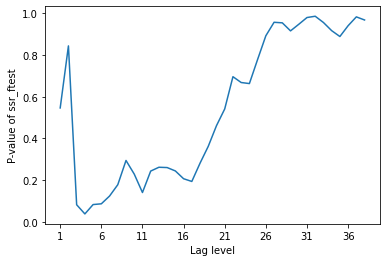

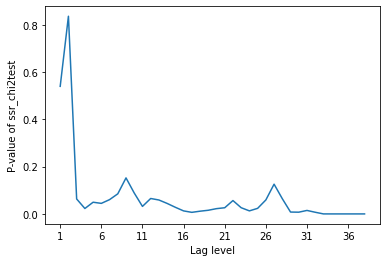

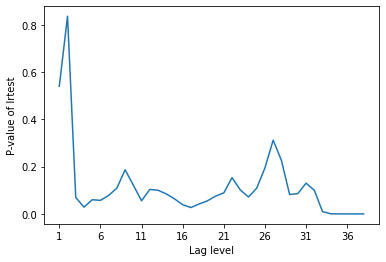

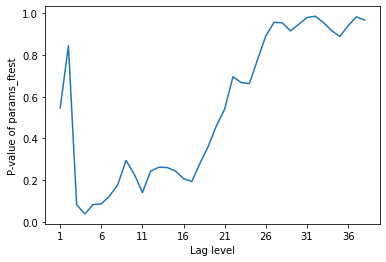

In [140]:
# To use this function you need to import plt, pd and grangercausdfalitytests
# There are four test {0:'ssr_ftest', 1:'ssr_chi2test' , 2:'lrtest',  3:'params_ftest'}
def ganger_cas_pvalue_graph(df, lag_level, test_num, print_summary = False):
  ganger_cas = grangercausalitytests(df, lag_level, verbose=print_summary) # if verbose = False， then this function don't automatically print summary of all four test
  test_index = {0:'ssr_ftest', 1:'ssr_chi2test' , 2:'lrtest',  3:'params_ftest'}
  test_name = test_index[test_num]
  pvalues = {}
  for i in range(lag_level):
    the_p = ganger_cas[i+1][0][test_name][1]
    pvalues[str(i+1)] = the_p
  pvalues = pd.Series(pvalues)
  graph = pvalues.plot(xlabel="Lag level", ylabel = ("P-value of " + test_name))
  plt.show()
  #series.plot()

ganger_cas_pvalue_graph(mini_fred_data, 38, 0, print_summary=True)
ganger_cas_pvalue_graph(mini_fred_data, 38, 1)
ganger_cas_pvalue_graph(mini_fred_data, 38, 2)
ganger_cas_pvalue_graph(mini_fred_data, 38, 3)
# From the we can see that lagged 8 month M2 (and later lagged M2) gangerly caused SP500

**Unit root test for stationarity**

In [141]:
# Unit root Test: Dickey-Fuller Test
# The null hypthoesis is there is a unit root and the data is not stationary
from statsmodels.tsa.stattools import adfuller

def take_adf_test(df, sig_level = 0.05):
  result = adfuller(df)
  print("Here is the ADF statistic: %f" % result[0])
  if result[1] < sig_level:
    print("The p-value is %f; it pass the test （default sig——level is 0.05）, and this series is stationary" % result[1])
  else:
    print("The p-value is %f; it fail the test （default sig——leadvel is 0.05）, and this series is not stationary" % result[1])

In [142]:
take_adf_test(mini_fred_data["M2"])
take_adf_test(mini_fred_data["SP500"])

# Becuase the two series are already stationary, there is no need for conducting cointegration test

Here is the ADF statistic: -11.612958
The p-value is 0.000000; it pass the test （default sig——level is 0.05）, and this series is stationary
Here is the ADF statistic: -9.464404
The p-value is 0.000000; it pass the test （default sig——level is 0.05）, and this series is stationary


**Data Split**

In [143]:
def data_spliter(df, pct_of_test = 0.2):
  table_len = len(df.index)
  train_len = round(table_len * (1-pct_of_test))
  test_len = round(table_len * (pct_of_test))
  train_set = df.iloc[:train_len, :]
  test_set = df.iloc[train_len: , :]
  return train_set, test_set

mini_fred_train, mini_fred_test = data_spliter(mini_fred_data)
print(mini_fred_train)

               SP500        M2
DATE                          
2011-04-29  0.028495  0.000000
2011-05-31 -0.013501  0.000000
2011-06-30 -0.018258  0.000000
2011-07-29 -0.021474  0.000000
2011-08-31 -0.056791  0.000000
...              ...       ...
2018-10-31 -0.069403  0.000000
2018-11-30  0.017859  0.000000
2018-12-31 -0.091777  0.029156
2019-01-31  0.078684  0.000000
2019-02-28  0.029729  0.000000

[95 rows x 2 columns]


**Determine the lags number**
- There could be many different criteria to use in this process, like listed
 - AIC : Akaike information criterion ; BIC : Schwartcz information criterion ; HQ : Hannan-Quinn criterion ; RMSE : Root Mean Square Error ; MAE : Mean Absolute Error; BP : Bias proportion ; LIK : Log-Likelihood.
- I will choose AIC and HQIC
- Parameter for each model
 - Log likelihood (l)  -how strong your data is for fitting the data？
 - Number of parameters (k)  - to avoid overgeneralize
 - Number of sample used(n)
 - AIC = 2k-2l ；

1    -15.124036
2    -15.187542
3    -15.130508
4    -15.097778
5    -15.122344
6    -15.263347
7    -15.525564
8    -15.482746
9    -15.508327
10   -15.439457
11   -15.394916
12   -15.417787
13   -15.344807
14   -15.544831
15   -15.485291
16   -15.591390
17   -15.558332
18   -15.445629
19   -15.521867
20   -15.511140
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)


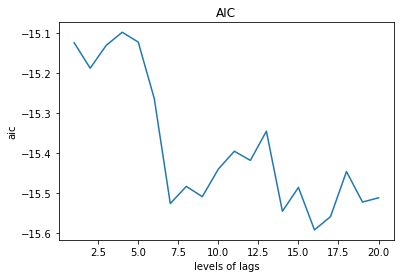

Text(0, 0.5, 'hqic')

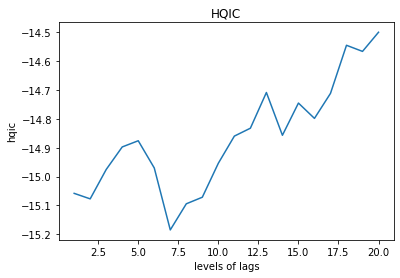

In [144]:
predict_model = VAR(mini_fred_train)

AIC_for_models = []
hqic_for_models = []
for lags in range(1, 21):
  result_model= predict_model.fit(lags)
  AIC_for_models.append(result_model.aic)
  hqic_for_models.append(result_model.hqic)
index = [num for num in range(1, 21)]
aic_series = pd.Series(dict(zip(index, AIC_for_models)))
hqic_series = pd.Series(dict(zip(index, hqic_for_models)))
print(aic_series)
aic_series.plot(title="AIC")
plt.xlabel("levels of lags")
plt.ylabel("aic")
plt.show()
hqic_series.plot(title="HQIC")
plt.xlabel("levels of lags")
plt.ylabel("hqic")

Determine the VAR model & Make forcast

In [145]:
final_model = predict_model.fit(16)
final_model.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Mar, 2021
Time:                     23:37:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.6119
Nobs:                     79.0000    HQIC:                  -14.7983
Log likelihood:           457.668    FPE:                1.88803e-07
AIC:                     -15.5914    Det(Omega_mle):     9.39349e-08
--------------------------------------------------------------------
Results for equation SP500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.046673         0.016954           -2.753           0.006
L1.SP500         -0.457002         0.156461           -2.921           0.003
L1.M2             0.205049         0.379051            0.541           0.589

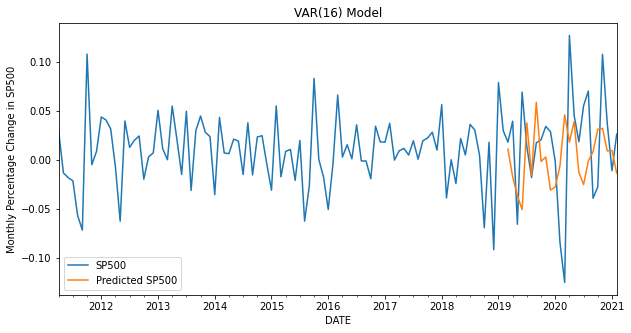

In [146]:
fred_train= mini_fred_train[-16:].values
forcast_result = pd.DataFrame(final_model.forecast(y=fred_train, steps=24) , index = mini_fred_test.index , columns= ["SP500","M2"])

#print(forcast_result)
print()
mini_fred_data["SP500"].plot(figsize=(10,5))    
forcast_result["SP500"].plot(label = "Predicted SP500")
plt.legend(loc = "best")
plt.ylabel("Monthly Percentage Change in SP500")
plt.title("VAR(16) Model")
plt.show()


In [147]:
#final_model.plot_forecast(24)
#plt.show()

In [148]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
# fit model
model = VARMAX(mini_fred_train, order=(8,1))
model_fit = model.fit(disp=False)
print(model_fit.summary())
# make prediction
forcast_result2 = model_fit.get_forecast()
print(forcast_result2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:        ['SP500', 'M2']   No. Observations:                   95
Model:                     VARMA(8,1)   Log Likelihood                 481.870
                          + intercept   AIC                           -881.741
Date:                Sun, 07 Mar 2021   BIC                           -777.032
Time:                        23:37:40   HQIC                          -839.430
Sample:                    04-29-2011                                         
                         - 02-28-2019                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                20.83, 40.98   Jarque-Bera (JB):         8.37, 131.90
Prob(Q):                        0.99, 0.43   Prob(JB):                   0.02, 0.00
Heteroskedasticity (H):         0.75, 0.59   Skew:                      -0.58, 1.93
Prob(H) (two-sided):            0.43,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


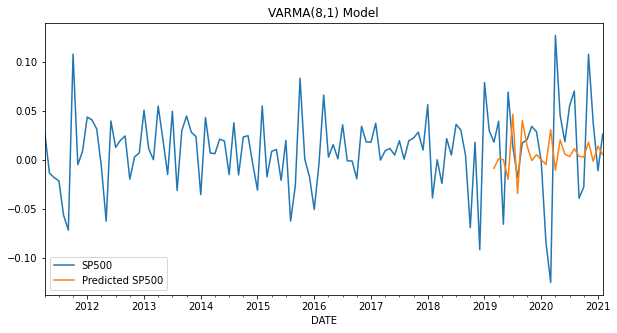

In [149]:
forcast_result2 = model_fit.forecast(steps=24)
forcast_result2 = forcast_result2.set_index(mini_fred_test.index)
#forcast_result2 = pd.DataFrame(model_fit.forecast(steps=24) , index = mini_fred_test.index , columns= ["SP500","M2"])
mini_fred_data["SP500"].plot(figsize=(10,5))    
forcast_result2["SP500"].plot(label = "Predicted SP500")
plt.legend(loc = "best")
plt.title("VARMA(8,1) Model")
plt.show()
#pd.DataFrame(model_fit.forecast(steps=24) , index = mini_fred_test.index , columns= ["SP500","M2"])

In [150]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print("The rmse of the prediction is:", rmse(forcast_result["SP500"], mini_fred_data["SP500"]))
print("The rmse of the prediction is:", rmse(forcast_result2["SP500"], mini_fred_data["SP500"]))

The rmse of the prediction is: 0.06467014875353583
The rmse of the prediction is: 0.06049389917349435
